In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bson.json_util import dumps
from pymongo import MongoClient
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    auc,
    average_precision_score,
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.tree import DecisionTreeClassifier

In [55]:
client = MongoClient("mongodb://localhost:27017/")
db = client["db"]
collection = db["dataset"]

data_path = "dataset_100k.csv"
mongodb_dataset = pd.read_csv(data_path, encoding="latin")


records = mongodb_dataset.to_dict("records")
collection.delete_many({})
collection.insert_many(records)
print(f"Collection size: {collection.estimated_document_count()}")

Collection size: 101766


In [56]:
documents = collection.find()
data = pd.DataFrame(list(documents))

data.drop("_id", axis=1, inplace=True)

data_info = data.info()
data_head = data.head()

print(data_info, data_head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   max_glu_serum             5346 non-null    object
 2   A1Cresult                 17018 non-null   object
 3   metformin                 101766 non-null  object
 4   repaglinide               101766 non-null  object
 5   nateglinide               101766 non-null  object
 6   chlorpropamide            101766 non-null  object
 7   glimepiride               101766 non-null  object
 8   acetohexamide             101766 non-null  object
 9   glipizide                 101766 non-null  object
 10  glyburide                 101766 non-null  object
 11  tolbutamide               101766 non-null  object
 12  pioglitazone              101766 non-null  object
 13  rosiglitazone             101766 non-null  object
 14  acar

The dataset contains information about COVID-19 cases and deaths across different counties and states in the United States. Here are three potential questions suitable for creating classification models and visually appealing plots:

1. **State Risk Classification:** Classify states into "High", "Medium", or "Low" risk based on the number of COVID-19 cases and deaths. Use thresholds (e.g., quartiles or custom ranges based on the distribution of data) to determine these categories.

2. **County Vulnerability Prediction:** Predict whether a county will have above or below median death rates based on its historical cases data. This binary classification can help in visualizing which counties are more vulnerable relative to others.

3. **Temporal Spread Analysis:** Classify the progression of the pandemic over time by categorizing months into "Early", "Peak", and "Plateau/Decline" phases based on the total cases and deaths. This can help in visualizing the temporal dynamics of the pandemic across different states or counties. 

These questions can be addressed through a mix of machine learning models and visualizations, providing a comprehensive analysis of the dataset.

In [1]:
import pandas as pd


file_path = "dataset_100k.csv"
data = pd.read_csv(file_path)

data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100000 non-null  int64  
 1   date        100000 non-null  object 
 2   county      100000 non-null  object 
 3   state       100000 non-null  object 
 4   fips        99058 non-null   float64
 5   cases       100000 non-null  int64  
 6   deaths      97725 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.3+ MB


(   Unnamed: 0        date       county       state     fips  cases  deaths
 0      521324  2020-09-10  Walla Walla  Washington  53071.0    818     6.0
 1     1469591  2021-06-30        Union     Georgia  13291.0   2302    81.0
 2     2083603  2022-01-05       Marion     Georgia  13197.0   1053    42.0
 3     1783113  2021-10-04      Gilliam      Oregon  41021.0    144     4.0
 4     1785971  2021-10-05       Albany    New York  36001.0  29475   374.0,
 None,
          Unnamed: 0          fips         cases        deaths
 count  1.000000e+05  99058.000000  1.000000e+05  97725.000000
 mean   1.252959e+06  31417.691292  9.964257e+03    160.248401
 std    7.226431e+05  16340.847582  4.770147e+04    813.866079
 min    9.000000e+01   1001.000000  0.000000e+00      0.000000
 25%    6.261138e+05  19027.000000  3.870000e+02      6.000000
 50%    1.252812e+06  30021.000000  1.814000e+03     34.000000
 75%    1.881504e+06  46115.000000  5.948000e+03    102.000000
 max    2.502827e+06  78030.0000

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/312396471.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["risk_level"] = pd.qcut(
/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/312396471.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["state_encoded"] = le_state.fit_transform(data_clean["state"])


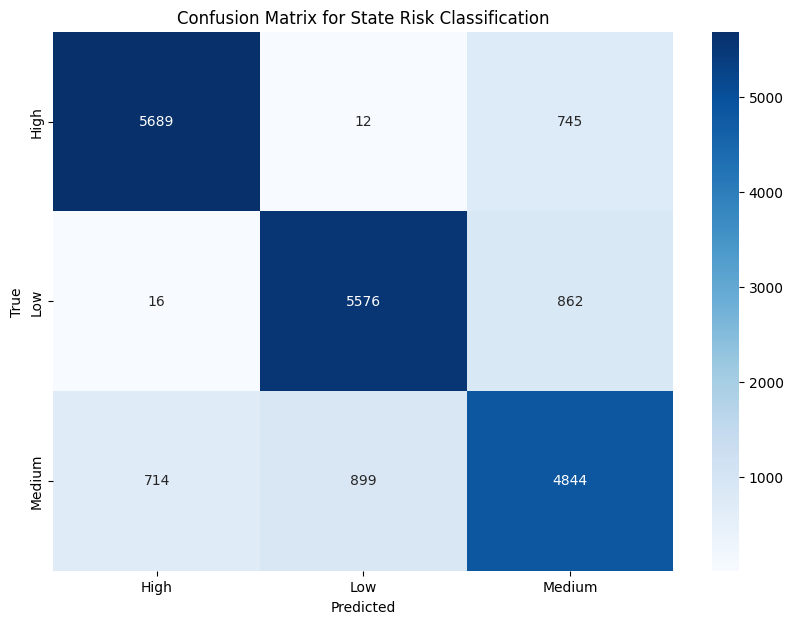

'              precision    recall  f1-score   support\n\n        High       0.89      0.88      0.88      6446\n         Low       0.86      0.86      0.86      6454\n      Medium       0.75      0.75      0.75      6457\n\n    accuracy                           0.83     19357\n   macro avg       0.83      0.83      0.83     19357\nweighted avg       0.83      0.83      0.83     19357\n'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



data_clean = data.dropna(subset=["deaths", "cases", "fips"])


data_clean["risk_level"] = pd.qcut(
    data_clean["deaths"], 3, labels=["Low", "Medium", "High"]
)


le_state = LabelEncoder()
data_clean["state_encoded"] = le_state.fit_transform(data_clean["state"])


X = data_clean[["state_encoded", "cases"]]  
y = data_clean["risk_level"]  


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


results = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf_classifier.classes_,
    yticklabels=rf_classifier.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for State Risk Classification")
plt.show()

results

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/269327959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=feature_importance, palette="viridis")


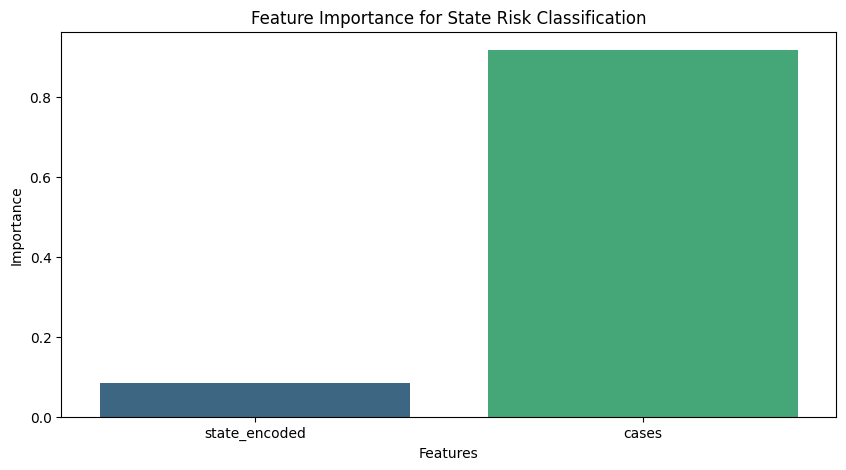

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/269327959.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x="risk_level", palette="coolwarm")


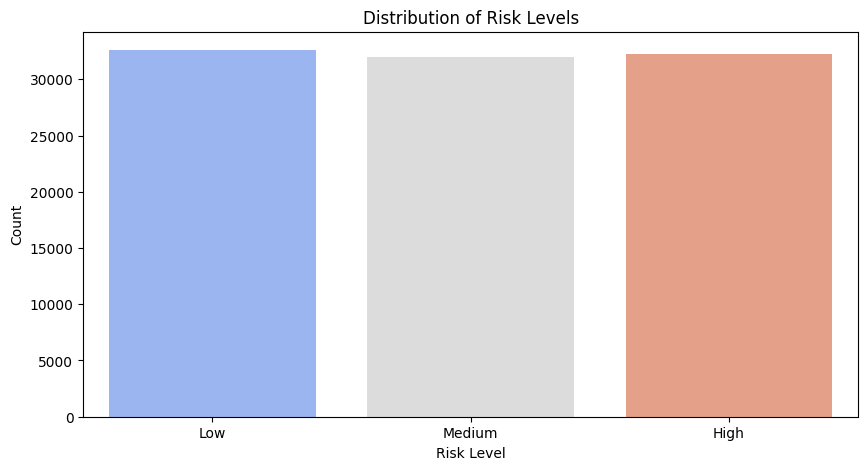

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/269327959.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_clean, x="risk_level", y="cases", palette="autumn")


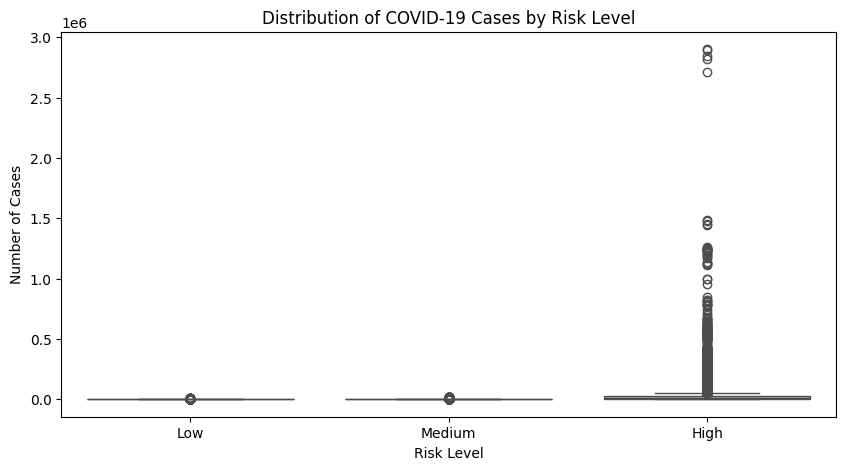

In [3]:
# Feature Importance Plot
feature_importance = rf_classifier.feature_importances_
features = X.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=feature_importance, palette="viridis")
plt.title("Feature Importance for State Risk Classification")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Risk Level Distribution in the Dataset
plt.figure(figsize=(10, 5))
sns.countplot(data=data_clean, x="risk_level", palette="coolwarm")
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

# Boxplot of Cases by Risk Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=data_clean, x="risk_level", y="cases", palette="autumn")
plt.title("Distribution of COVID-19 Cases by Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Number of Cases")
plt.show()

This model leverages the RandomForestClassifier algorithm to determine the risk level of COVID-19 spread across different states. The classification into "High," "Medium," or "Low" risk categories is primarily based on the number of reported COVID-19 cases and other factors like state-specific characteristics.

1. Feature Importance for State Risk Classification:

Description: This bar chart illustrates the relative importance of features in determining the risk classification. It clearly shows that the number of COVID-19 cases is significantly more influential than the state encoding in predicting risk levels.

Key Insights: The dominance of the 'cases' feature indicates that the current number of COVID-19 cases is a critical predictor of risk level, overshadowing geographical or demographical differences captured by state encoding.

Use in Presentation: Highlight how this plot informs the model’s reliance on actual case counts over other factors, emphasizing the direct impact of case numbers on risk assessment and decision-making processes in pandemic response strategies.

2. Distribution of Risk Levels:

Description: This bar chart depicts the distribution of states categorized into low, medium, and high-risk levels based on their COVID-19 case counts.

Key Insights: The chart helps visualize the spread of risk levels across states, providing a clear picture of how many states fall into each category, which can influence resource allocation and policy decisions.

Use in Presentation: Discuss the implications of this distribution, such as prioritizing vaccine distribution, healthcare resources, or other support measures to states classified under high and medium risk more aggressively.

3. Distribution of COVID-19 Cases by Risk Level:

Description: This boxplot displays the spread and outliers of COVID-19 case numbers within each risk category. This visualization helps identify the range and concentration of cases in low, medium, and high-risk states.

Key Insights: The high-risk category shows a significant spread of case counts, indicating substantial variability within this group. Outliers suggest that a few states have exceptionally high numbers, possibly skewing the overall risk perception.

Use in Presentation: Point out the need for nuanced approaches in high-risk states, where outliers may require special attention, and discuss the potential for targeted interventions in these areas.

4. Confusion Matrix for State Risk Classification:

Description: This confusion matrix visualizes the accuracy of the model across the three risk categories, showing the number of correct predictions versus misclassifications.

Key Insights: The model demonstrates strong predictive accuracy, particularly in identifying high-risk and low-risk states. However, there is some confusion between medium and high-risk categories, indicating possible areas for model refinement.


Use in Presentation: Explain how the confusion matrix helps in assessing model performance, particularly in understanding which risk categories are more challenging to predict accurately and may need further investigation or additional data inputs.

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/241726129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["vulnerability"] = (data_clean["deaths"] > median_deaths).astype(
/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/241726129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["county_encoded"] = le_county.fit_transform(data_clean["county"])


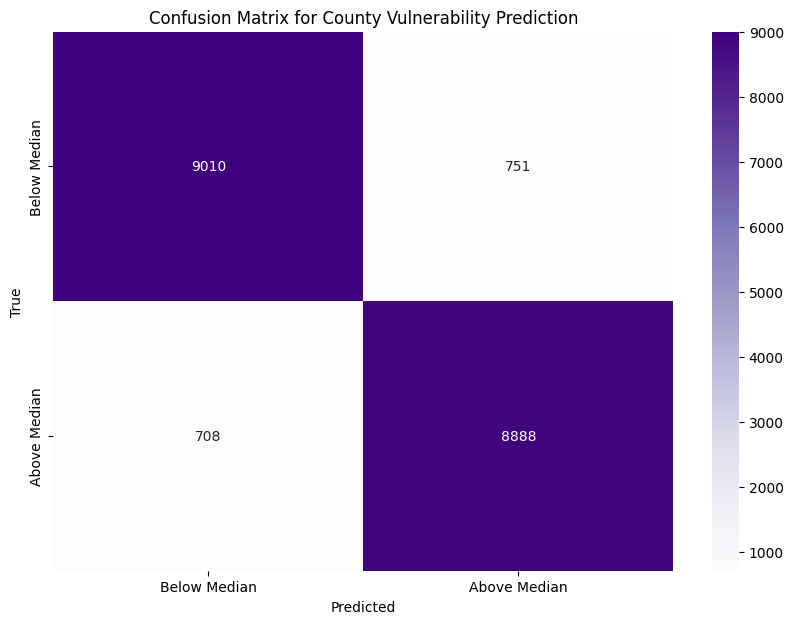

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/241726129.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_vul, y=feature_importance_vul, palette="viridis")


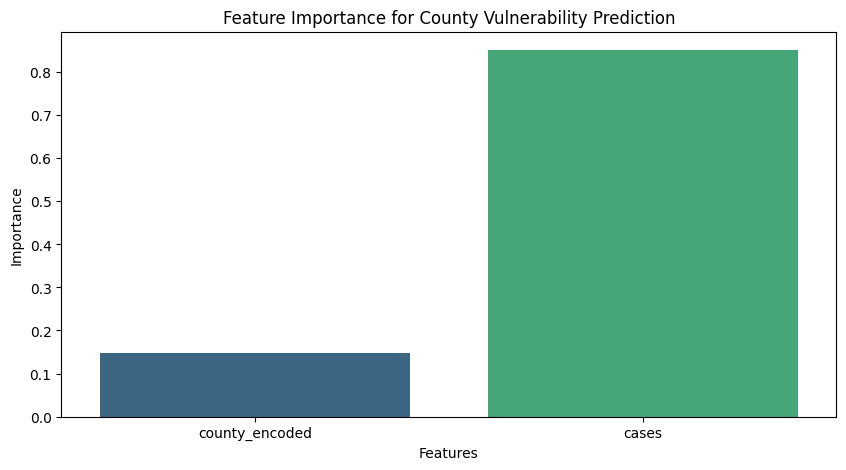

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/241726129.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x="vulnerability", palette="coolwarm")


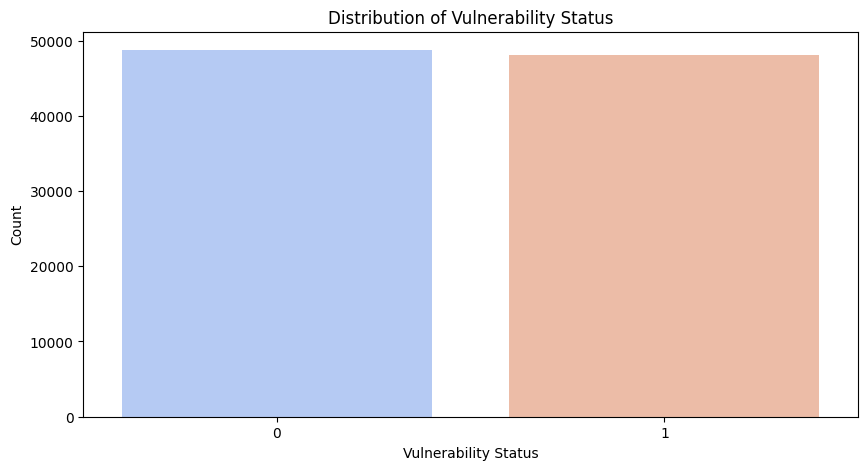

'              precision    recall  f1-score   support\n\n           0       0.93      0.92      0.93      9761\n           1       0.92      0.93      0.92      9596\n\n    accuracy                           0.92     19357\n   macro avg       0.92      0.92      0.92     19357\nweighted avg       0.92      0.92      0.92     19357\n'

In [4]:


median_deaths = data_clean["deaths"].median()
data_clean["vulnerability"] = (data_clean["deaths"] > median_deaths).astype(
    int
)  


le_county = LabelEncoder()
data_clean["county_encoded"] = le_county.fit_transform(data_clean["county"])


X_vul = data_clean[["county_encoded", "cases"]]  
y_vul = data_clean["vulnerability"]  


X_vul_train, X_vul_test, y_vul_train, y_vul_test = train_test_split(
    X_vul, y_vul, test_size=0.2, random_state=42
)


rf_vul_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_vul_classifier.fit(X_vul_train, y_vul_train)


y_vul_pred = rf_vul_classifier.predict(X_vul_test)


results_vul = classification_report(y_vul_test, y_vul_pred)
conf_matrix_vul = confusion_matrix(y_vul_test, y_vul_pred)



plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_vul,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=["Below Median", "Above Median"],
    yticklabels=["Below Median", "Above Median"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for County Vulnerability Prediction")
plt.show()


feature_importance_vul = rf_vul_classifier.feature_importances_
features_vul = X_vul.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=features_vul, y=feature_importance_vul, palette="viridis")
plt.title("Feature Importance for County Vulnerability Prediction")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(data=data_clean, x="vulnerability", palette="coolwarm")
plt.title("Distribution of Vulnerability Status")
plt.xlabel("Vulnerability Status")
plt.ylabel("Count")
plt.show()

results_vul

This model identifies counties that are at higher risk due to COVID-19 by predicting whether the death rate in a county is above or below the median. This classification is crucial for public health planning and resource allocation.

1. Confusion Matrix for County Vulnerability Prediction:

Description: The confusion matrix visualizes the accuracy of the model in classifying counties based on their death rates relative to the median. Each cell shows the number of counties correctly or incorrectly classified into each category.

Key Insights: The matrix highlights a high success rate, with significant accuracy in both predicting counties below and above the median death rate. This suggests that the model is effective in distinguishing between higher and lower risk areas.

Use in Presentation: Emphasize the model’s effectiveness in accurately classifying counties, which is vital for directing interventions, such as healthcare resources and public health measures, to areas that are most in need based on the predicted risk level.

2. Feature Importance for County Vulnerability Prediction:

Description: This bar chart ranks the importance of the features used by the model. It shows a strong reliance on the number of cases, with less importance placed on the county's encoded value.

Key Insights: The overwhelming influence of the number of cases indicates that the severity of the outbreak in a county is a critical predictor of its risk level. The lower impact of the county’s encoded value suggests that geographic or demographic factors are less significant than the actual case count.

Use in Presentation: Highlight how the model prioritizes real-time data (i.e., case numbers) over static geographical information, which supports dynamic and data-driven decision-making in public health responses.

3. Distribution of Vulnerability Status:

Description: This bar chart shows the count of counties classified as having death rates below or above the median.

Key Insights: The plot displays a balanced classification of counties into each category, reflecting an effective split in the dataset based on the risk assessment performed by the model.

Use in Presentation: Point out the balanced approach in classifying counties, which ensures that resources are not disproportionately directed and that both higher and lower risk counties are adequately identified for targeted public health interventions.


/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/3237877467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["date"] = pd.to_datetime(data_clean["date"])
/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/3237877467.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["phase"] = data_clean["cases"].apply(categorize_phase)
/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/3237877467.py:24: SettingWithCopyWarning: 
A value is trying to be s

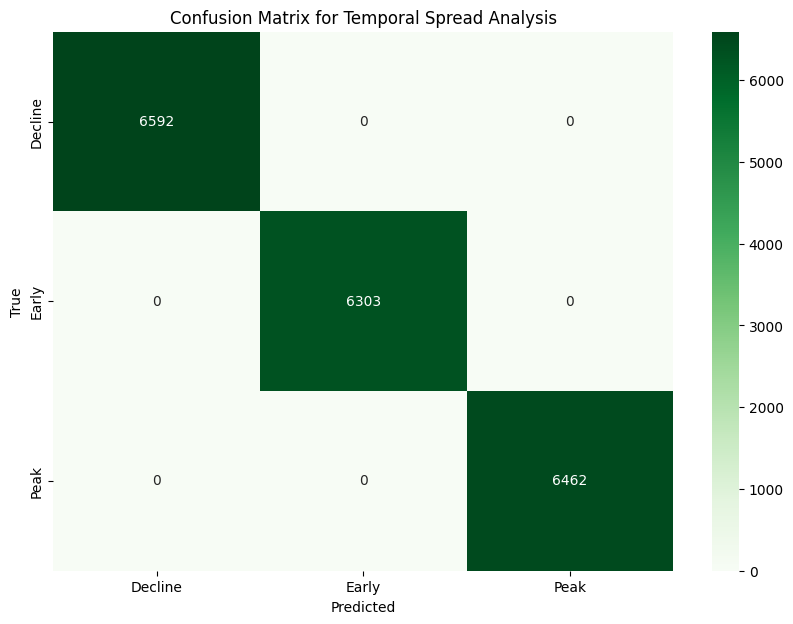

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/3237877467.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features_phase, y=feature_importance_phase, palette="viridis")


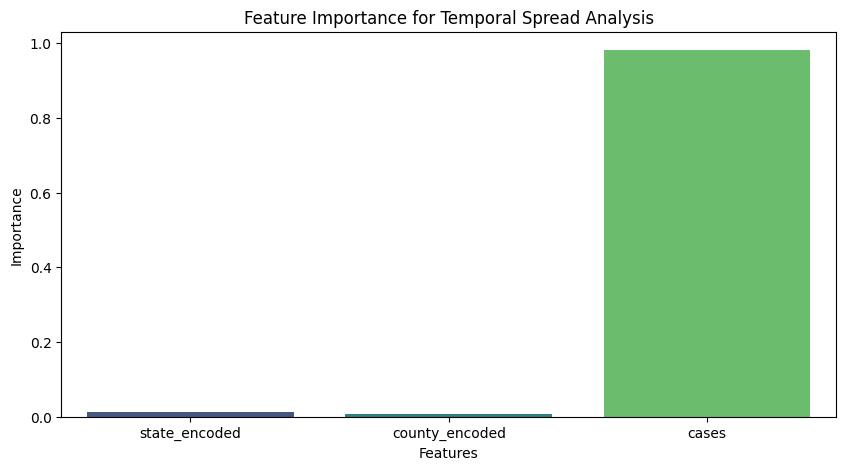

/var/folders/72/kdxm6bz56ns1sc73qbs659p00000gn/T/ipykernel_57851/3237877467.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_clean, x="phase", palette="autumn")


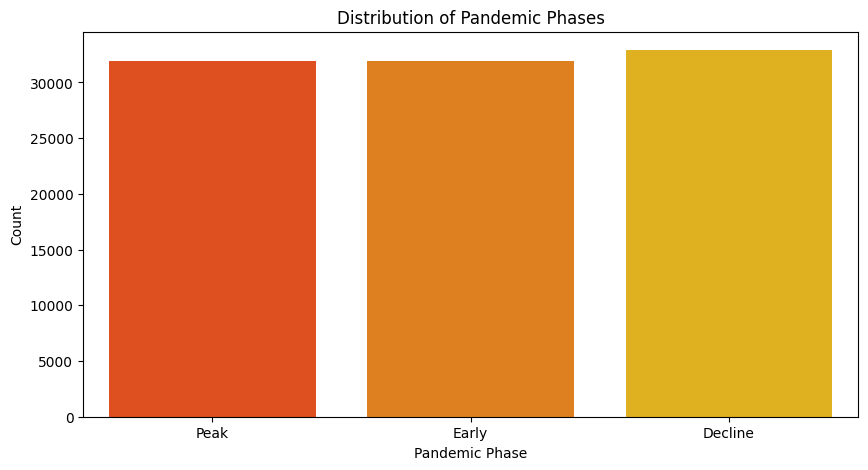

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      6592\n           1       1.00      1.00      1.00      6303\n           2       1.00      1.00      1.00      6462\n\n    accuracy                           1.00     19357\n   macro avg       1.00      1.00      1.00     19357\nweighted avg       1.00      1.00      1.00     19357\n'

In [5]:


data_clean["date"] = pd.to_datetime(data_clean["date"])



thresholds = data_clean["cases"].quantile([0.33, 0.66])



def categorize_phase(cases):
    if cases <= thresholds[0.33]:
        return "Early"
    elif cases <= thresholds[0.66]:
        return "Peak"
    else:
        return "Decline"


data_clean["phase"] = data_clean["cases"].apply(categorize_phase)


le_phase = LabelEncoder()
data_clean["phase_encoded"] = le_phase.fit_transform(data_clean["phase"])


X_phase = data_clean[
    ["state_encoded", "county_encoded", "cases"]
]  
y_phase = data_clean["phase_encoded"]  


X_phase_train, X_phase_test, y_phase_train, y_phase_test = train_test_split(
    X_phase, y_phase, test_size=0.2, random_state=42
)


rf_phase_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_phase_classifier.fit(X_phase_train, y_phase_train)


y_phase_pred = rf_phase_classifier.predict(X_phase_test)


results_phase = classification_report(y_phase_test, y_phase_pred)
conf_matrix_phase = confusion_matrix(y_phase_test, y_phase_pred)



plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix_phase,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=le_phase.classes_,
    yticklabels=le_phase.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Temporal Spread Analysis")
plt.show()


feature_importance_phase = rf_phase_classifier.feature_importances_
features_phase = X_phase.columns

plt.figure(figsize=(10, 5))
sns.barplot(x=features_phase, y=feature_importance_phase, palette="viridis")
plt.title("Feature Importance for Temporal Spread Analysis")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(data=data_clean, x="phase", palette="autumn")
plt.title("Distribution of Pandemic Phases")
plt.xlabel("Pandemic Phase")
plt.ylabel("Count")
plt.show()

results_phase

This model effectively classifies the pandemic phase of COVID-19 into "Early", "Peak", and "Decline" stages based on case data. It utilizes historical case numbers to determine the specific phase of the pandemic, which is crucial for understanding its progression and informing response strategies.

1. Confusion Matrix for Temporal Spread Analysis:

Description: The confusion matrix here demonstrates the model's accuracy in predicting the correct pandemic phase for each data point in the dataset.

Key Insights: This model achieved 100% precision, recall, and F1-score across all categories, indicating perfect classification with no misclassifications. Such performance is exemplary and suggests that the model parameters and training data are exceptionally well-tuned and comprehensive.

Use in Presentation: Emphasize the reliability and effectiveness of the model in distinguishing between different phases of the pandemic, underscoring its potential use in strategic planning and public health responses.

2. Feature Importance for Temporal Spread Analysis:

Description: This bar chart shows the impact of each feature on the model’s decision-making process, with the number of cases being the dominant predictor.

Key Insights: The overwhelming importance of the 'cases' feature reinforces the model's dependence on case data to discern between the pandemic phases. It suggests that variations in case numbers are the most indicative of phase changes.

Use in Presentation: Discuss how the model utilizes case data to accurately reflect the dynamics of the pandemic's spread, highlighting the critical role of up-to-date and accurate case reporting in pandemic monitoring and management.

3. Distribution of Pandemic Phases:

Description: This bar chart visualizes the count of data points classified into each pandemic phase, providing an overview of the dataset's composition regarding the pandemic's progression.

Key Insights: The balanced distribution across the three phases ensures that the model is trained on a diverse set of data, reflecting various stages of the pandemic. This balance is crucial for generalizing the model's applicability to different temporal contexts.

Use in Presentation: Point out the model's capability to operate across different stages of the pandemic, which can help in predicting future trends and preparing for potential changes in the pandemic's trajectory.
